<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
           <p style="font-size:150%;text-align:center">Redes de decisión</p>
        </td>
    </tr>
</table>

---


# Objetivo  <a class="anchor" id="inicio"></a>

En este notebook veremos cómo tomar decisiones racionales, entendidas estas como aquellas que maximizan la utilidad esperada del agente. Veremos que podemos echar mano de las redes bayesianas, pero necesitamos también el concepto de las funciones de utilidad.

Adaptado de Russell & Norvig (2021), cap. 16.

# Secciones

* [Utilidad esperada y toma de decisiones.](#MEU)
* [Implementación de redes de decisión](#implementacion)
* [Escenarios más complejos.](#dependencia)
* [Agente basado en utilidad.](#utility-based)


# Utilidad esperada y toma de decisiones   <a class="anchor" id="MEU">



Hemos visto que uno de los objetivos de la Inteligencia Artificial es producir agentes cuyo comportamiento sea inteligente. Este se ha entendido tradicionalmente como la realización de acciones racionales, las cuales  buscan obtener fines de la manera más eficiente posible. Imagine que un agente debe tomar una decisión de entre un conjunto de acciones $\{a_1,\ldots, a_0\}$. Cada acción $a_i$ produce un estado $S_i$. Si el agente fuera indiferente frente a los estados $S_i$s, entonces cualquier acción estaría bien para él y el problema de decisión sería trivial. No obstante, un agente racional tiene un objetivo que quiere cumplir. Esto divide los estados $S_i$s en aquellos que cumplen el objetivo y aquellos que no. Es más, muchas veces es posible asignar una preferencia entre dos estados, $S_i$ y $S_j$, de tal manera que el agente prefiere a $S_i$ sobre $S_j$ si el primero lo acerca más a su objetivo que el segundo. Así pues, un agente racional, frente a su problema de decisión, realizará la acción $a$ que con mayor probabilidad lo lleve al estado que esté más cerca del objetivo.
    
Es posible formalizar esta idea usando tres conceptos. El primero es el de una *lotería*, el cual no es otra cosa que un conjunto de estados, cada uno con una probabilidad asignada: $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$. El segundo es el de una *función de utilidad* $U$, la cual le asigna un valor numérico a cada estado $S_i$ de tal manera que $U(S_i)>U(S_j)$ sii el agente prefiere el estado $S_i$ sobre el estado $S_j$. Estos dos conceptos nos permiten definir la *Utilidad Esperada* de la siguiente manera:
    
$$U\!E=\sum_{i=1}^n U(S_i)p_i$$
    
El tercer concepto es que el conjunto de estados $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$ depende de una acción $a$. Es decir, se representan situaciones en las cuales el resultado de una acción $a$ es incierta. La incertidumbre resulta porque la acción no determina completamente el resultado cuando, por ejemplo, este depende de otros agentes, o de factores que no son completamente conocidos y/o controlables por el agente. Esto es, una acción $a$ da como resultado un estado $S_1$ con probabilidad $P(S_1|a)$, o un estado $S_2$ con probabilidad $P(S_2|a)$, $\ldots$, o un estado $S_n$ con probabilidad $P(S_n|a)$. Así pues, tenemos el concepto de *Utilidad Esperada* de una acción $a$:
    
$$U\!E(a)=\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (1)$$

Un agente racional, frente a un problema de decisión, decidirá ejecutar la acción que le permita **maximizar su utilidad esperada**:
    
$$\mbox{Acción}=\mbox{argmax}_a\, U\!E(a)=\mbox{argmax}_a\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (2)$$

## Ejemplo con el mundo del Wumpus

Para ilustrar esta propuesta de cómo un agente toma una decisión racional, volvamos a nuestro bien conocido mundo del Wumpus. Suponga que el agente, después de partir de la celda $(0,0)$, se encuentra en la casilla $(1,0)$. Analicemos dos situaciones posibles, como lo muestran las siguientes figuras:

<table>
  <tr>
    <td><img src="./imagenes/ParaRedesDecisionB.png" width="300"></td>
    <td><img src="./imagenes/ParaRedesDecisionA.png" width="300"></td>
  </tr>
</table>

Las dos situaciones corresponden a si el agente siente una brisa (izquierda) o no (derecha). ¿Cuál es la acción racional en cada caso? Observe que el agente tiene tres acciones posibles:

1. Regresarse a $(0,0)$
2. Seguir a $(2,0)$
3. Subir a $(1,1)$.


Hagamos el ejercicio de asignar utilidades a los estados resultantes de estas acciones. Estos estados son, claramente, la casilla a la que llega el agente después de realizar la acción. Vamos a proceder a determinar la utilidad con base en la consideración de si en la casilla correspondiente hay o no un pozo y de si está o no el oro. Por ejemplo:

$$
U(\mbox{casilla}(x,y)) = \begin{cases}
1, & \mbox{si }oro(x,y) \wedge \neg pozo(x,y)\\
0, & \mbox{si }\neg oro(x,y) \wedge \neg pozo(x,y)\\
-1, & \mbox{ si }pozo(x,y)
\end{cases}
$$

Dado que el agente desconoce la localización de los pozos y del oro, no es posible deducir cuál es la utilidad de una casilla. No obstante, como vimos en el notebook pasado, sí podemos cuantificar la incertidumbre y revisar nuestras predicciones con base en la información que vamos incorporando. Podemos entonces ponderar la utilidad de cada estado posible con su probabilidad de ocurrencia, mediante la fórmula de la utilidad esperada (1). En este caso tendríamos:

\begin{align*}
U\!E(\mbox{ir a casilla }(x,y)|e)&=U(oro(x,y), \neg pozo(x,y))P(oro(x,y), \neg pozo(x,y)|e)\\
& \quad + U(\neg oro(x,y), \neg pozo(x,y))P(\neg oro(x,y), \neg pozo(x,y)|e)\\
&=U(oro(x,y), \neg pozo(x,y))P(oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + U(\neg oro(x,y), \neg pozo(x,y))P(\neg oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + U(pozo(x,y))P(pozo(x,y)|e)\\
&= 1\times P(oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + 0 \times P(\neg oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad - 1 \times P(pozo(x,y)|e)
\end{align*}

La acción racional queda determinada por la fórmula (2) de maximización de la utilidad esperada, la cual requiere que realicemos el cálculo anterior para todas las acciones posibles, de tal manera que escogeremos la acción que tenga asociada la mayor utilidad esperada. 

Ahora bien, observe que llevar a cabo estos cálculos puede hacerse con o sin evidencia. Observe también que la evidencia disponible es lo que separa la situación de la figura de arriba a la izquierda (en donde la evidencia es que hay brisa en $(1,0)$) de la situación de la derecha (en donde no hay brisa). Podríamos tratar de hacer los cálculos a mano, pero es más divertido programar el computador para que los haga por nosotros.

Vamos a ver a continuación cómo usar el objeto `InfluenceDiagram` de la librería `pyagrum` para implementar el cálculo de la toma racional de decisiones. Comenzaremos con una situación en que no consideramos el oro, que es más sencilla, para luego incluir esta complicación en nuestros cálculos.

# Implementación de redes de decisión <a class="anchor" id="implementacion">
    
([Volver al inicio](#inicio))

Una red de decisión, también conocida como un diagrama de influencia, es una red que incorpora una red bayesiana, un nodo de acción y otro de utilidad (es posible tener más de un nodo de acción y más de un nodo de utilidad, pero en nuestros ejemplos solo tendremos uno de cada uno). Mediante ella es posible calcular las utilidades esperadas de las acciones de acuerdo a las probabilidades establecidas en la red bayesiana y la evidencia disponible.
    
En la red de decisión hay tres tipos de nodos:
    
* Nodos de probabilidad: son los nodos de la red bayesiana.
* Nodo de decisión: es el nodo que representa las acciones posibles.
* Nodo de utilidad: está conectado a los demás nodos de tal manera que representa la utilidad esperada de cada acción del nodo de decisión, de acuerdo a las probabilidades de los nodos de probabilidad.
 
Para comprender mejor estos conceptos, creemos una red de decisión simple para el ejemplo del mundo del Wumpus que discutimos anteriormente. 

### Ejemplo sin considerar el oro <a class="anchor" id="sin_oro">
    
([Siguiente ejemplo](#solo_oro))



Vamos a comenzar con un caso sencillo, en el cual no tomamos en cuenta si hay o no oro en una casilla. De esta manera, nuestra función de utilidad es la siguiente:
    
$$
U(\mbox{casilla}(x,y)) = \begin{cases}
1, & \mbox{si }\neg pozo(x,y)\\
-1, & \mbox{ si }pozo(x,y)
\end{cases}
$$
    
Lo primero que debemos hacer es cargar las librerías que necesitamos:

In [1]:
import warnings
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import pyAgrum.lib.notebook as gnb
import numpy                as np
import pyAgrum              as gum

from time           import time
from tqdm.notebook  import tqdm
from itertools      import product
from entornos       import *
from agentes        import *
from busqueda       import *

gum.config['notebook','potential_visible_digits']=2
warnings.filterwarnings('ignore')

### Definiciones

En esta parte se encontrarán las funciones necesarias para poder resolver el problema.

In [2]:
# Casillas adyacentes del mundo wumpus 
def adyacentes(c):
    return W.adyacentes(c)

def maximo_aleatorio(valores):
    max_ =  max(valores)
    
    indices = [i for i, x in enumerate(valores) if x == max_]
    return np.random.choice(indices)

In [3]:
# probabilidad de que haya un pozo, teniendo en cuenta la brisa
def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

# probabilidad de que este el oro, teniendo en cuenta el brillo
def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]

# probabilidad de que este el wumpus, teniendo en cuenta su hedor
def wumpus_a_hedor(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]
    
    
# Nuestra función de utilidad
def utilidad(d):
    C = d['Casilla']
    
    # Si la acción va a una casilla sin wumpus y sin pozo y hay oro en esa casilla 
    # el puntaje es de 5
    if (d['wumpus'+str(C)] == 0) and (d['pozo'+str(C)] == 0) and (d['oro'] == C):
        return 5
    
    # si no hay oro, pozo, ni wumpus, el premio es de cero 
    # (no castigamos el explorar)
    elif (d['wumpus'+str(C)] == 0) and (d['pozo'+str(C)] == 0):
        return 0
    
    # si la casilla tiene wumpus obtiene un -3
    elif (d['wumpus'+str(C)] == 1) and (d['pozo'+str(C)] == 0):
        return -3
    
    # si la casilla tiene un pozo obtiene -5
    elif (d['wumpus'+str(C)] == 0) and (d['pozo'+str(C)] == 1):
        return -5
    
    else:
        return -1

In [4]:
def creando_todas_variables(model, casillas, ady_agente):
    
    # variable oro con muchas etiquetas
    oro = gum.LabelizedVariable('oro','oro',len(casillas))

    for i, c in enumerate(casillas):
        
        # Variables de oro
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('brillo'+str(c),'brillo'+str(c),2)
        model.addChanceNode(brillo_i)
        
        # Variables de pozo
        pozo_i = gum.LabelizedVariable('pozo'+str(c),'pozo'+str(c),2)
        model.addChanceNode(pozo_i)
        
        # Variables de brisa
        brisa_i = gum.LabelizedVariable('brisa'+str(c),'brisa'+str(c),2)
        model.addChanceNode(brisa_i)
        
        # Variables de wumpus
        wumpus_i = gum.LabelizedVariable('wumpus'+str(c),'wumpus'+str(c),2)
        model.addChanceNode(wumpus_i)
        
        # Variables de hedor
        hedor_i = gum.LabelizedVariable('hedor'+str(c),'hedor'+str(c),2)
        model.addChanceNode(hedor_i)
        
    model.addChanceNode(oro)
    
    return model


def creando_variable_casilla(model, ady_agente):
    
    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse', len(ady_agente))
    
    for i, c in enumerate(ady_agente):
        casilla.changeLabel(i,str(c))
        
    model.addDecisionNode(casilla)
    
    return model


def creando_aristas_grafo(model, casillas, ady_agente):
    
    # creamos los diferentes arcos que unen a los nodos entre nodos
    for c in casillas:
        model.addArc('oro', 'brillo'+str(c))
        
        for c1 in adyacentes(c):
            model.addArc('pozo'+str(c), 'brisa'+str(c1))
            model.addArc('wumpus'+str(c), 'hedor'+str(c1))
            
    for c in ady_agente:
        model.addArc('pozo'+str(c), 'UtilityOfCasilla')
        model.addArc('wumpus'+str(c), 'UtilityOfCasilla')
        
    model.addArc('oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    return model

In [5]:
def crear_red_decision(posicion_agente):   
    
    # se crea el modelo
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    
    # casillas adyacentes a la pocisión del agente
    ady_agente = adyacentes(posicion_agente)
    num_casillas = len(ady_agente)
    
    # agregar todas las variables a nuestro modelo
    model = creando_todas_variables(model, todas_casillas, ady_agente)
    model = creando_variable_casilla(model, ady_agente)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)
    
    model = creando_aristas_grafo(model, todas_casillas, ady_agente)
    
    # Creando tablas de probabilidad de cada variable
    model.cpt('oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['pozo'+str(c) for c in todas_casillas]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]
        
    wumpus = ['wumpus'+str(c) for c in todas_casillas]
    for wump in wumpus:
        model.cpt(wump)[:]=[0.9,0.1]
        
        
    for c in todas_casillas:
        
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
            
        hedor = 'hedor' + str(c)
        wumpus_hedor = ['wumpus'+str(c1) for c1 in adyacentes(c)]
        
        opciones = list(product(*[[0,1] for p in wumpus_hedor]))
        dicts_variables = [{wumpus_hedor[i]:op[i] for i in range(len(wumpus_hedor))} for op in opciones]
        for d in dicts_variables:
            model.cpt(hedor)[d] = wumpus_a_hedor(d)

        
    # Creando la utilidad
    pozos = ['pozo'+str(c) for c in ady_agente]
    wumpus = ['wumpus'+str(c) for c in ady_agente]    
    casillas = [str(c) for c in ady_agente]
    
    todas_casillas = [str(c) for c in todas_casillas]
    
    variables = ['Casilla','oro'] + pozos + wumpus
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos + wumpus]))
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)
        
    return model    

In [6]:
def tomar_decision(casilla, evs, tabla=False, imagen=False):
    # Creamos la red de decision para la casilla dada
    model = crear_red_decision(casilla)
    
    # Guardamos solo la evidencia que cae en las variables de la red de decisión
    evid = {v:evs[v] for v in evs.keys() if v in model.names()}
    
    # Hacemos la inferencia
    ie = gum.InfluenceDiagramInference(model)
    ie.setEvidence(evid)
    ie.makeInference()
    
    casillas = [c for c in adyacentes(casilla)]
    valores = ie.posteriorUtility("Casilla")
    
    if tabla:
        print(valores)
        
    # Escogemos la acción con mayor utilidad esperada
    decision = maximo_aleatorio(valores.tolist())
    
    if tabla:
        print('Decisión ->', casillas[decision])
        
    if imagen:
        gnb.showInference(model,evs=evid,targets={},size="100")
        
    return casillas[decision]

In [7]:
def programa_utility_based(self, DEB=False):
       
    # Encuentra la casilla actual
    casilla_actual = self.loc
    # print('agente en:', casilla_actual, self.oro)
    direccion = self.direccion
    percepcion = self.perceptos
    casillas_seguras = self.seguras
    evidencia = self.evidencia
    oro = self.oro
    
    # Si tiene el oro y está en la casilla de salida, salir
    if oro and (casilla_actual == (0,0)):
        self.acciones = ['salir']
        
    # Si ve el oro, lo toma y planea un camino hasta la salida
    if 'brillo' in percepcion:
        # print("¡Veo el oro!")
        self.oro = True
        self.acciones = ['agarrar']
        
        R = Rejilla(casilla_actual, (0,0), casillas_seguras)
        
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acs = acciones_camino(camino, direccion)
        
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
        self.acciones += acs
        
    else:
        # Escoje la casilla de mayor utilidad
        casilla_ir = tomar_decision(casilla_actual, evidencia, tabla=DEB)
        camino = [casilla_actual, casilla_ir]
        acs = acciones_camino(camino, direccion)
        
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
            
        self.acciones += acs

setattr(Agente, "programa", programa_utility_based)

Juego terminado!
 Puntaje: 962


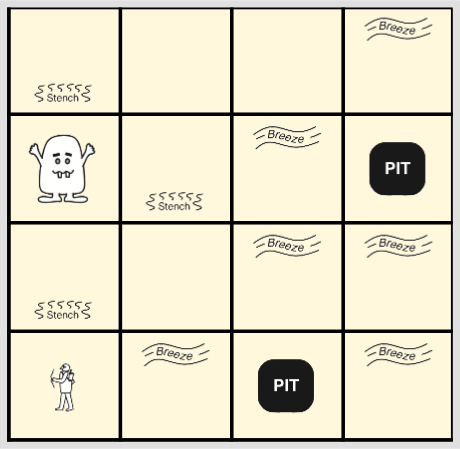

In [9]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
agente = Agente()

evidencia = {'pozo(0, 0)':0}
casillas_seguras = []

setattr(Agente, "evidencia", evidencia)
setattr(Agente, "seguras", casillas_seguras)

formulas = agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']

agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)

max_turnos = 80
W.pintar_todo()
plt.show()

for t in range(max_turnos):
    # vis(agente)
    casilla_actual = agente.loc
    
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(agente.loc)
    agente.perceptos = W.para_sentidos()
    
    if 'brillo' not in agente.perceptos:
        agente.evidencia['brillo'+str(casilla_actual)] = 0
    
    if 'brisa' in agente.perceptos:
        agente.evidencia['brisa'+str(casilla_actual)] = 1
    
    else:
        agente.evidencia['brisa'+str(casilla_actual)] = 0
    
    if 'hedor' in agente.perceptos:
        agente.evidencia['hedor'+str(casilla_actual)] = 1
    
    else:
        agente.evidencia['hedor'+str(casilla_actual)] = 0
    
    # print(agente.evidencia)
    a = agente.reaccionar(DEB=False)

    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    
    clear_output(wait=True)
    agente.estimar_estado(W)
    W.pintar_todo()
    plt.show()
    sleep(.5) 

In [ ]:
from random import choice, sample

# Función para crear mundos del wumpus random, teniendo en cuenta que
# no puede haber nada en la casilla (0,0)
def random_wumpus():

    # Casillas aleatorias
    casillas = [(x, y) for y in range(4) for x in range(4)]
    casillas_set = set(casillas) - set([(0,0)])
    
    oro_pos    = choice(list(casillas_set))
    wumpus_pos = choice(list(casillas_set))
    casillas_set = casillas_set - set([wumpus_pos, oro_pos])
    
    pozos_pos  = sample(list(casillas_set), 2)
    
    # creación del mundo wumpus, con solo un oro, un wumpus, y dos pozos
    W = Wumpus(wumpus = wumpus_pos, oro = oro_pos, pozos = pozos_pos)
    
    return W

In [ ]:
# Función para poner a jugar nuestro agente

def jugar(max_turnos, wumpus):
    
    agente = Agente()

    evidencia = {'pozo(0, 0)':0}
    casillas_seguras = []

    setattr(Agente, "evidencia", evidencia)
    setattr(Agente, "seguras", casillas_seguras)

    formulas = agente.fluentes_mapa_mental()
    formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']

    agente.base = LPQuery(formulas)
    agente.perceptos = wumpus.para_sentidos()
    c = agente.interp_percepto(mundo='wumpus')
    agente.base.TELL(c)
    
    
    for t in range(max_turnos):
    # vis(agente)
        casilla_actual = agente.loc

        if casilla_actual not in casillas_seguras:
            casillas_seguras.append(agente.loc)
        agente.perceptos = wumpus.para_sentidos()

        if 'brillo' not in agente.perceptos:
            agente.evidencia['brillo'+str(casilla_actual)] = 0

        if 'brisa' in agente.perceptos:
            agente.evidencia['brisa'+str(casilla_actual)] = 1

        else:
            agente.evidencia['brisa'+str(casilla_actual)] = 0

        if 'hedor' in agente.perceptos:
            agente.evidencia['hedor'+str(casilla_actual)] = 1

        else:
            agente.evidencia['hedor'+str(casilla_actual)] = 0

        a = agente.reaccionar(DEB=False)

        formula_accion = f'{a}_{agente.turno-1}'
        agente.base.TELL(formula_accion)
        wumpus.transicion(a)

        if not wumpus.juego_activo:
            #clear_output(wait=True)
            #print(wumpus.mensaje)
            return wumpus.puntaje

        #clear_output(wait=True)
        agente.estimar_estado(wumpus)
    
    return 0

In [ ]:
def medir_agente( nmuestras  = 30,
                  tamaño     = 4, 
                  max_turnos = 100):
    
    """
        INPUT:
                - formulas:     lista de formulas para crear la base de conocimiento.
                - nmuestras:    cantidad de mediciones, juegos a jugar.
                - tamaño:       dimensiones del mapa de juego (tamaño x tamaño)
                - dificultad:   proporción de la cantidad total de casillas del mapa que tendrá
                                una bomba.
                                
        OUTPUT:
                - tiempos   -> np.array de dimensiones (nmuestras,). medidas de tiempo de ejecución.
                - resultado -> np.array de dimensiones (nmuestras,). resultado del juego, True para ganó.
    """

    
    #vectores de tiempos y resultados
    tiempos   = np.zeros(nmuestras)
    resultado = np.zeros(nmuestras)
    
    #contador
    for contador in tqdm(list(range(nmuestras))):
        
        wumpus = random_wumpus()
        
        inicio = time()
        resultado[contador] = jugar(max_turnos, wumpus)
        final  = time()
        
        tiempos[contador] = final - inicio
        clear_output(wait = False)
        
    return tiempos, resultado

In [ ]:
def graficar_resultados(tiempos: np.array, resultado: np.array, nombre: str):
    
    resultados = np.array(resultado)
    intentos = np.arange(0, resultados.shape[0])
    
    fig, axs = plt.subplots(nrows = 3, ncols = 1)
    fig.tight_layout(pad=1.0)
    
    axs[0].boxplot(tiempos)
    axs[0].set_ylabel("segundos (s)")

    axs[1].plot(tiempos)
    axs[1].plot(np.ones(tiempos.shape)*np.mean(tiempos))
    axs[1].legend(["tiempo (s)", "media (s)"])
    
    axs[2].plot(intentos, resultados)
    axs[2].plot(intentos, np.ones(intentos.shape)*np.mean(resultados))
    axs[2].legend(["resultado del juego", "puntaje medio"])
    #axs[2].set_yticks(["pierde", "gana"])

    clear_output(wait=True)
    plt.plot()
    plt.savefig(nombre, dpi=1200)
    
    print(f"tiempo medio de ejecución:\t\t\t\t {np.mean(tiempos)}")
    print(f"desviación estándar de tiempo de ejecución:\t\t {np.std(tiempos)}")
    
    print(f"puntaje medio:\t\t\t\t\t\t {np.mean(resultados)}")
    print(f"desviacion estandar del puntaje:\t\t\t {np.std(resultados)}")
    print(f"puntaje mínimo:\t\t\t\t\t\t {np.min(resultados)}")
    print(f"puntaje máximo:\t\t\t\t\t\t {np.max(resultados)}")

    print(f"porcentaje de victorias:\t\t\t\t {np.mean(resultados>0)}")

In [ ]:
tiempos, resultado = medir_agente(nmuestras  = 100, 
                                  tamaño     = 4,
                                  max_turnos = 100)

In [ ]:
mpl.rcParams['figure.dpi'] = 600
plt.rcParams["figure.figsize"] = [10.50, 5.50]

graficar_resultados(tiempos, resultado, "result.png")

En este notebook usted aprendió:

* Asociar las acciones racionales con la maximización de la utilidad esperada.
* Implementar redes de decisión mediante el paquete `pyAgrum`.
* Implementar un programa de agente basado en la utilidad.